# Exploring the Netflix Dataset

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

from kneed import KneeLocator
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Handling null data

There are too many entries with either director, cast and country with null values to simply eliminate them. Those null values will be replaced with a string 'No data'.
All the other entries with null values will just be eliminated.

In [4]:
df['director'].fillna('No data', inplace=True)
df['cast'].fillna('No data', inplace=True)
df['country'].fillna('No data', inplace=True)

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


### Some transformations

I will eliminate the show_id but keep the default index for now.

The date_added feature will be splitted into 3: day, month and year.

In [5]:
df.drop(columns=['show_id'], inplace=True)

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['date_added_year'] = df['date_added'].dt.year
df['date_added_month'] = df['date_added'].dt.month
df['date_added_month_name'] = df['date_added'].dt.month_name()
df['date_added_day'] = df['date_added'].dt.day

In [7]:
df['country'] = df['country'].str.split(',').str[0]

In [8]:
df['listed_in'] = df['listed_in'].str.split(', ')

In [9]:
df['count'] = 1

In [10]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_month_name,date_added_day,count
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,9,September,25,1
1,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021,9,September,24,1


## When is content usually released?

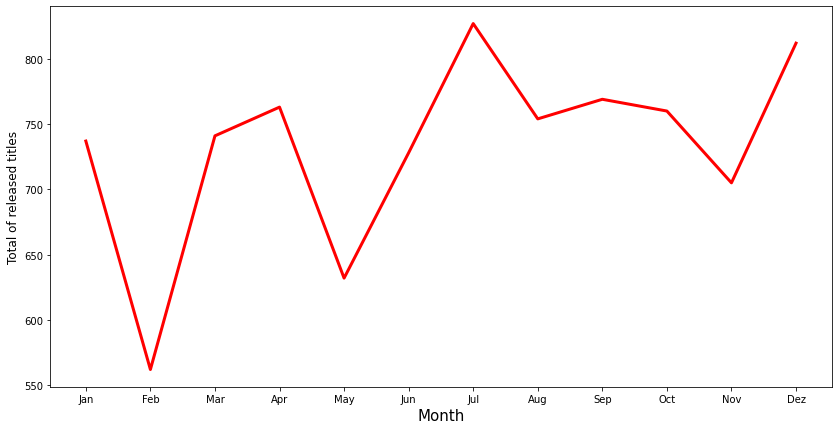

In [11]:
df_seasonal = df.groupby('date_added_month')['count'].sum()

x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dez']
y = df_seasonal.to_numpy()

fig, ax = plt.subplots(1, 1, figsize=(14,7))
ax.plot(x, y, lw=3, c='r')
ax.set_xlabel('Month', fontsize='15')
ax.set_ylabel('Total of released titles', fontsize='12')

plt.show()

The **large majority of titles** are released during summer (June to August, peaking in July) and Christmas time (December and January). This makes sense because most people have vacations in these periods. Next to those comes the Easter time (March and April).

Although, if one wants to **release a new content and doesn't want to worry about competition**, February or May are very good months to do so.

## Movies vs. TV Shows

In [12]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

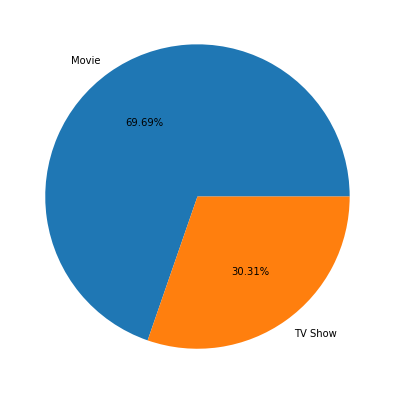

In [13]:
labels = df['type'].unique().tolist()
counts = [df['type'].tolist().count(labels[0]), df['type'].tolist().count(labels[1])]

fig1, ax1 = plt.subplots(1, 1, figsize=(14,7))
ax1.pie(x=counts, labels=labels, autopct='%.2f%%')

plt.show()

In most cases, it makes more sense to just compare movies with movies and tv shows with tv shows. I will now split this dataset in two.

In [14]:
df_movies = df.loc[df['type'] == 'Movie']
df_movies['minutes'] = df_movies['duration'].str.split(' ').str[0].astype('int')
df_movies.drop(columns=['type','duration'], inplace=True)


df_tvshows = df.loc[df['type'] == 'TV Show']
df_tvshows['num_seasons'] = df_tvshows['duration'].str.split(' ').str[0].astype('int')
df_tvshows.drop(columns=['type','duration'], inplace=True)

### Movies duration

<AxesSubplot:ylabel='Density'>

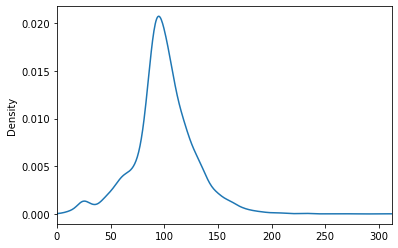

In [15]:
ma = df_movies['minutes'].max()
df_movies['minutes'].plot.kde(xlim=(0,ma))

The vast majority of the movies on Netflix have their duration between 75 and 125 minutes. This makes sense, considering few people like to watch more than a 2 hours movie straight. Everyone complains if a movie is too long... but binge watch an entire season is a peace of cake, right? :p

#### What are the longest movies? And the shortest?

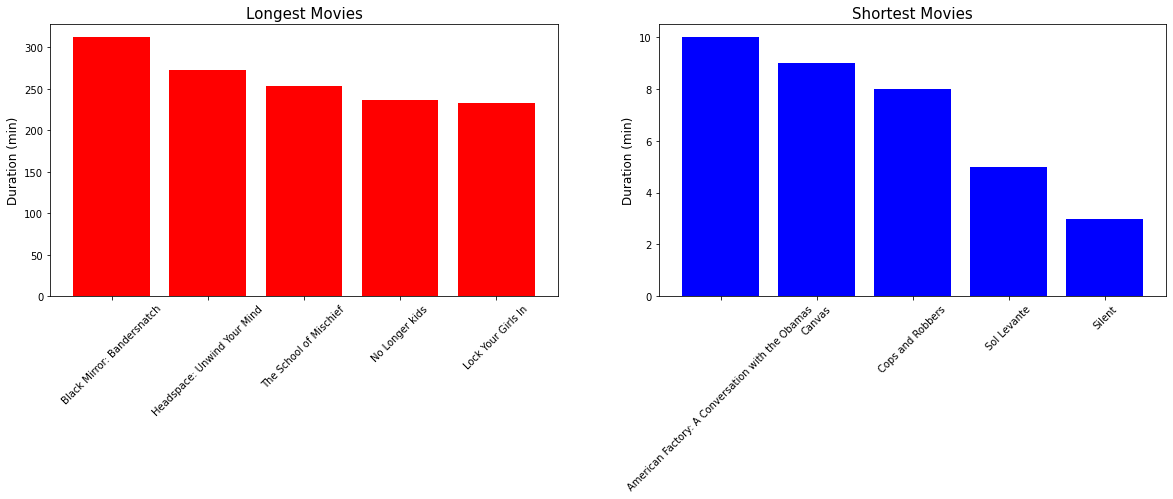

In [16]:
long_movies = df_movies[['title','minutes']].sort_values(by='minutes', ascending=False)
short_movies = long_movies.tail(5)
long_movies = long_movies.head(5)

long_labels = long_movies['title'].to_numpy()
short_labels = short_movies['title'].to_numpy()

fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].bar(x=long_labels, height=long_movies['minutes'].to_numpy(), color='r')
ax[0].set_title('Longest Movies', fontsize=15)
ax[0].set_xticklabels(long_labels, rotation=45)
ax[0].set_ylabel('Duration (min)', fontsize=12)
ax[1].bar(x=short_labels, height=short_movies['minutes'].to_numpy(), color='b')
ax[1].set_title('Shortest Movies', fontsize=15)
ax[1].set_xticklabels(short_labels, rotation=45)
ax[1].set_ylabel('Duration (min)', fontsize=12)

plt.show()

### TV Shows duration

<AxesSubplot:ylabel='Density'>

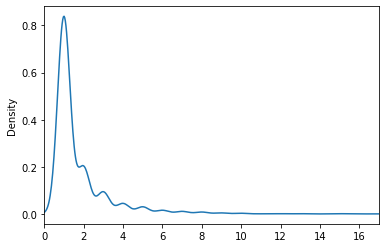

In [17]:
ma = df_tvshows['num_seasons'].max()
df_tvshows['num_seasons'].plot.kde(xlim=(0,ma))

Most of Netlix TV shows have only one season. This is also an expected value. Consider that under the category of "one season series" falls a lot of content:
* Limited Series
* Unsuccessful shows cancelled after the first season
* Ongoing tv shows that recently started (and a lot of content started in the last few years)

#### What are the longest TV Shows?

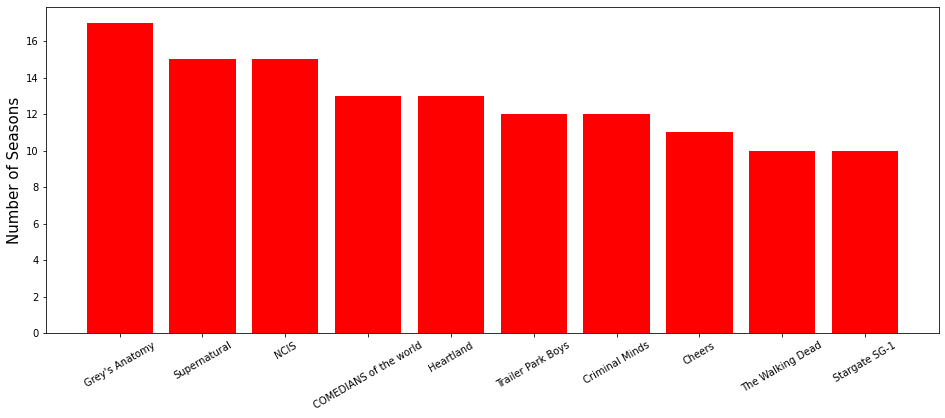

In [18]:
long_shows = df_tvshows[['title', 'num_seasons']].sort_values(by='num_seasons', ascending=False)[:10]

fig, ax = plt.subplots(1, 1, figsize=(16,6))

idx = long_shows['title'].to_numpy()
duration = long_shows['num_seasons'].to_numpy()
ax.bar(idx, duration, color='red')
ax.set_xticklabels(idx, rotation='30')
ax.set_ylabel('Number of Seasons', fontsize=15)

plt.show()

**Note:** If the dataset had information on content rating (not age rating!), it would be nice to see if rating was correlated with the number of seasons. I would expect series with a high number of seasons to have good ratings because it doesn't make sense to keep spending money on content that has negative feedback from the viewers.

## When was most content released?

I said above that content of Netflix was being released now more than ever. But I said it out common knowledge. Let's check if the data agrees with my statement!

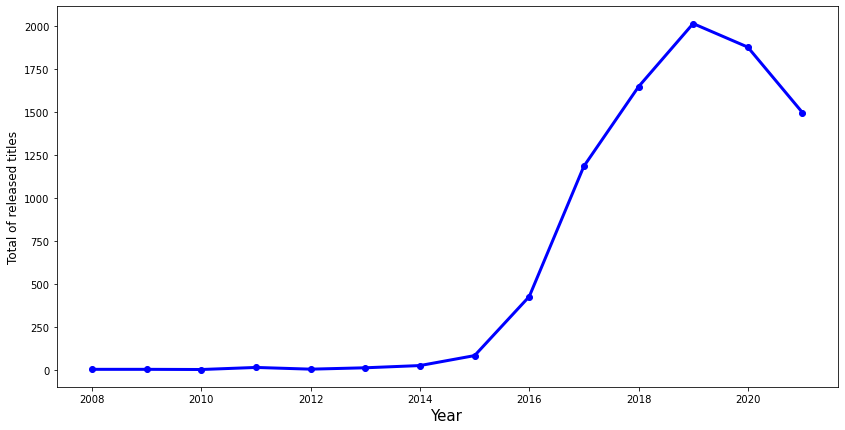

In [19]:
df_yearly = df.groupby('date_added_year')['count'].sum()

x = df_yearly.index
y = df_yearly.to_numpy()

fig, ax = plt.subplots(1, 1, figsize=(14,7))
ax.plot(x, y, lw=3, c='b', marker='o')
ax.set_xlabel('Year', fontsize='15')
ax.set_ylabel('Total of released titles', fontsize='12')

plt.show()

Indeed, the data confirms my lastest statement. We can observe a significant rise in releases on the year 2016 and this number exploded until it reached a peak in 2018. What changed after 2016?

According to Wikipedia, Netflix started to produce original content in 2013 and expanded to international productions in 2017. These information may justify both the slow rise in 2014 and the explosion after 2016. (source: https://en.wikipedia.org/wiki/Netflix )

## How much content is a Netflix Original?

The Netflix database used for this example doesn't have information on whether the content is an original production or not. An approximation of this information will be to check if **a title was added to the Netflix on the year it was released** or not, since an original Netflix content will always be available on Netflix as soon as that content is released.

I will then compare the total available content with the *approximation number* of original Netflix content throughout the years.

In [20]:
df_sameyear = df.loc[df['date_added_year'] == df['release_year']].groupby('date_added_year')['count'].sum()
# get accumulated sum
df_sameyear = df_sameyear.cumsum()

df_total = df.groupby('date_added_year')['count'].sum()
df_total = df_total.cumsum()

df_releases = pd.merge(df_total, df_sameyear, how='outer', left_index=True, right_index=True)

# Deal with NaN:
# if no new title, the value is the same as the previous year
df_releases.fillna(method='ffill', inplace=True)
# deal with first line
df_releases.fillna('0', inplace=True)

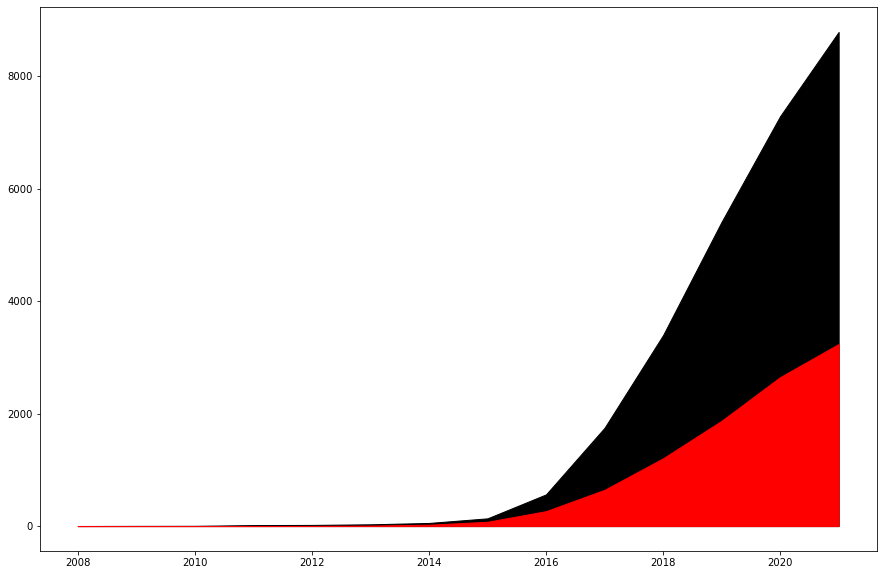

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

x = df_releases.index.to_numpy()

total = df_releases.iloc[:,0].to_numpy()
direct = df_releases.iloc[:,1].astype(int).to_numpy()

ax.fill_between(x, total, color='black')
ax.fill_between(x, direct, color='red')
#ax.plot(x, direct, color='red')

plt.show()

As mentioned before, Netflix started producing original content in 2013, which is where the black and red areas start to come apart.

On 2016, around half of the content falls under my *approximation* of original content, which is the year Netflix start making internation productions. As the years went by, production of this type of content continued to rise, but it only represents about 1/3 of all the content available in the streaming platform.

## Which contries have more content on Netflix?

In [22]:
df_countries = df.loc[df['country'] != 'No data']
df_countries = df_countries.groupby('country')['count'].sum().sort_values(ascending=False)[:10]
df_countries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object', name='country')

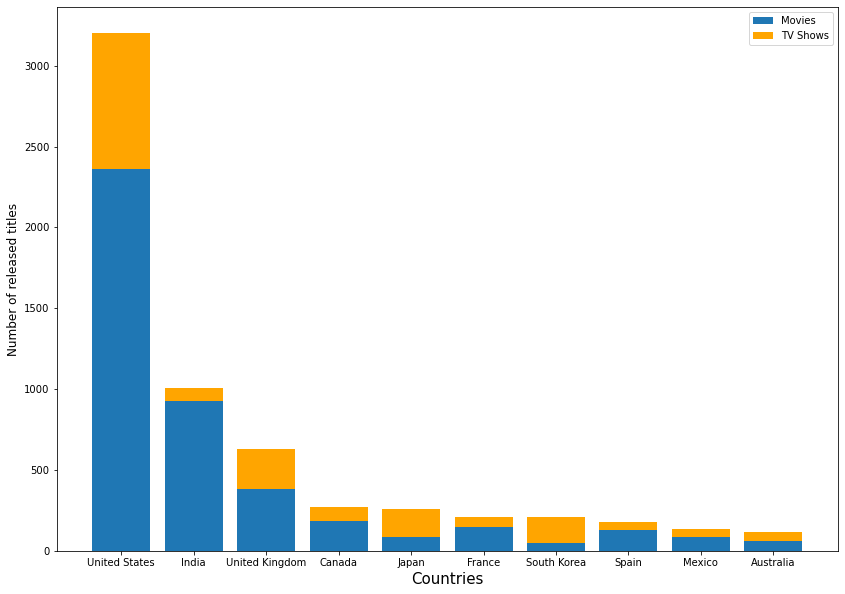

In [23]:
movies_country = df_movies.groupby('country')['count'].sum()
movies_country = movies_country[df_countries.index]
series_country = df_tvshows.groupby('country')['count'].sum()
series_country = series_country[df_countries.index]

fig, ax = plt.subplots(1, 1, figsize=(14,10))

idx = df_countries.index.to_numpy()
mov = movies_country.to_numpy()
tv = series_country.to_numpy()

ax.bar(idx, mov)
ax.bar(idx, tv, bottom=mov, color='orange')
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of released titles', fontsize=12)
ax.legend(labels=['Movies', 'TV Shows'])

plt.show()

The vast majority of Netflix titles are from the US, which makes sense considering it's where Netflix was born in the first place (August 29, 1997 in Scotts Valley, California, US).

In the shown top 10, movies are the dominant content, which complies to pie chart displayed above. Exceptions for the Japan and South Korea.

### K-Drama: genres in South Korea

In recent years, K-dramas have become quite popular. Let's see if this genre dominates South Korea's titles.

In [24]:
SKorea = df.loc[df['country'] == 'South Korea', ['title', 'type', 'listed_in']]
SKorea.head()

,title,type,listed_in
104,Tayo the Little Bus,TV Show,"[Kids' TV, Korean TV Shows]"
124,Pororo - The Little Penguin,TV Show,"[Kids' TV, Korean TV Shows]"
289,The Crowned Clown,TV Show,"[International TV Shows, Romantic TV Shows, TV..."
456,Her Private Life,TV Show,"[International TV Shows, Romantic TV Shows, TV..."
545,YooHoo to the Rescue,TV Show,"[Kids' TV, Korean TV Shows]"


In [25]:
SKorea_movies = SKorea.loc[SKorea['type'] == 'Movie']
SKorea_tvshows = SKorea.loc[SKorea['type'] == 'TV Show']

In [26]:
list_genres = []    # enumerate every unique genre
for sublist in list(SKorea['listed_in']):
     for item in sublist:
            if item not in list_genres:
                list_genres.append(item)

# flatten genres in movies and tv shows
movies_genres = []
for sublist in list(SKorea_movies['listed_in']):
     for item in sublist:
        movies_genres.append(item)
            
tvshows_genres = []
for sublist in list(SKorea_tvshows['listed_in']):
     for item in sublist:
        tvshows_genres.append(item)

In [27]:
SKorea_genres = pd.DataFrame()
SKorea_genres['genre'] = sorted(list_genres)
SKorea_genres.set_index('genre', inplace=True)

temp = pd.DataFrame()
temp['genre'] = movies_genres
temp['movies'] = 1
temp = temp.groupby('genre')['movies'].sum().to_frame()
SKorea_genres = SKorea_genres.merge(temp, how='outer', left_on='genre', right_on='genre')

temp = pd.DataFrame()
temp['genre'] = tvshows_genres
temp['tv_shows'] = 1
temp = temp.groupby('genre')['tv_shows'].sum().to_frame()
SKorea_genres = SKorea_genres.merge(temp, how='outer', left_on='genre', right_on='genre')

# drop non-relevant genres
SKorea_genres.drop(index=['International Movies','International TV Shows','Korean TV Shows','Independent Movies'], inplace=True)

SKorea_genres.head()

,movies,tv_shows
genre,,
Action & Adventure,16.0,NaN
Children & Family Movies,3.0,NaN
Comedies,10.0,NaN
Crime TV Shows,NaN,24.0
Cult Movies,1.0,NaN


**Note:** Some of the transformations done ended up not being necessary as Movies and TV Shows have no genre with the same name. This is due to TV genres having the word 'TV' in almost all of them. My initial goal was to have a Pandas DataFrame with all the genres as indexes and two columns, counting movies and tv shows for the indexed genre. A possible solution could be to simply remove the 'TV' and 'Movies' words from the string in the indexes.

Still, I will not remove this code because this would be what I'd do if the genre names were stardardized.

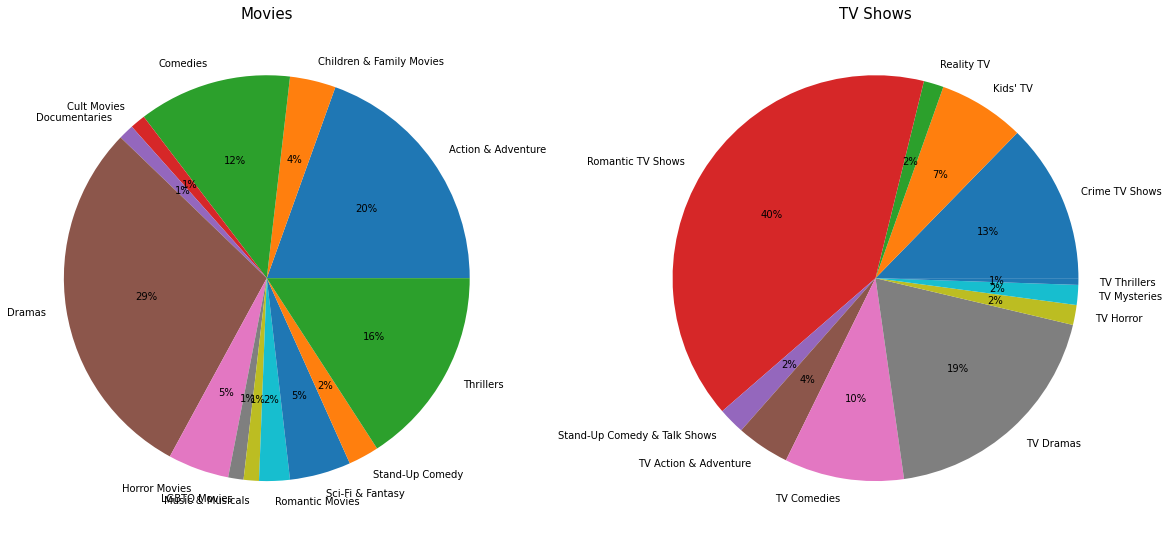

In [28]:
labels_movies = SKorea_genres['movies'].dropna().index
counts_movies = SKorea_genres['movies'].dropna().to_numpy()

labels_tvshows = SKorea_genres['tv_shows'].dropna().index
counts_tvshows = SKorea_genres['tv_shows'].dropna().to_numpy()

fig, ax = plt.subplots(1, 2, figsize=(20,12))
ax[0].pie(x=counts_movies, labels=labels_movies, autopct='%.0f%%')
ax[0].set_title('Movies', fontsize=15)
ax[1].pie(x=counts_tvshows, labels=labels_tvshows, autopct='%.0f%%')
ax[1].set_title('TV Shows', fontsize=15)

plt.show()

As expected, K-Dramas own their place on the top of the South Korean content on Netflix. Regarding movies, they are the most represented genre and on TV Shows they are second, only loosing to Romantic TV Shows.

### Are Drama and Romantic Shows "the same"?

I was actually commenting these results with my home mate saying: "Oh, K-Drama is not the most predominant genre in Korean TV Shows, it's Romantic" and he actually answered with "Like there is a difference! Every drama is romantic drama!" 

Well, is there a difference?

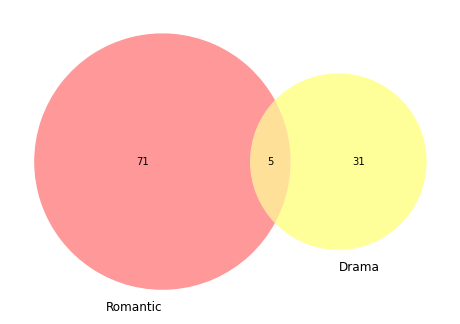

In [29]:
romantic = SKorea_tvshows[SKorea_tvshows['listed_in'].apply(lambda x: 'Romantic TV Shows' in x)].index
drama = SKorea_tvshows[SKorea_tvshows['listed_in'].apply(lambda x: 'TV Dramas' in x)].index

plt.figure(figsize=(8,6))
v = venn2([set(romantic), set(drama)], set_colors=('red','yellow'), set_labels=('Romantic', 'Drama'))
plt.show()

It looks like the data doesn't agree with my home mate. From a universe of 107 TV Shows labeled as Romantic or Drama, only 5 of them share these two genres.

## Recomendation System

It's impossible to think about Netflix and not think about doing a recomendation system. I must confess I'd like to again have the information about the quality rates of the titles, but I'll do a simple one using the data that I have.

I'll do one using the movies subset, but the logic is exactly the same for the TV shows. The system will be based on the unsupervised machine learning method called K-Means Clustering.

In [30]:
df_rec_system = df_movies[['title', 'rating', 'listed_in']]

# Simplify age ratings using information from: https://atlascinemas.net/ratings.html 

ratings = {
    'TV-PG': 'PG',
    'TV-MA': 'R',
    'TV-Y7-FV': 'PG',
    'TV-Y7': 'PG',
    'TV-14': 'PG13',
    'R': 'R',
    'TV-Y': 'G',
    'NR': 'R',
    'PG-13': 'PG13',
    'TV-G': 'G',
    'PG': 'PG',
    'G': 'G',
    'UR': 'R',
    'NC-17': 'R'
}

df_rec_system['rating'] = df['rating'].replace(ratings)

df_rec_system.head()

,title,rating,listed_in
0,Dick Johnson Is Dead,PG13,[Documentaries]
6,My Little Pony: A New Generation,PG,[Children & Family Movies]
7,Sankofa,R,"[Dramas, Independent Movies, International Mov..."
9,The Starling,PG13,"[Comedies, Dramas]"
12,Je Suis Karl,R,"[Dramas, International Movies]"


### Encoding age ratings

In [31]:
rating_enc = pd.get_dummies(df_rec_system.rating)

df_rec_system = pd.merge(df_rec_system, rating_enc, how='inner', left_index=True, right_index=True)
df_rec_system.drop(columns='rating', inplace=True)

df_rec_system

,title,listed_in,G,PG,PG13,R
0,Dick Johnson Is Dead,[Documentaries],0,0,1,0
6,My Little Pony: A New Generation,[Children & Family Movies],0,1,0,0
7,Sankofa,"[Dramas, Independent Movies, International Mov...",0,0,0,1
9,The Starling,"[Comedies, Dramas]",0,0,1,0
12,Je Suis Karl,"[Dramas, International Movies]",0,0,0,1
...,...,...,...,...,...,...
8801,Zinzana,"[Dramas, International Movies, Thrillers]",0,0,0,1
8802,Zodiac,"[Cult Movies, Dramas, Thrillers]",0,0,0,1
8804,Zombieland,"[Comedies, Horror Movies]",0,0,0,1
8805,Zoom,"[Children & Family Movies, Comedies]",0,1,0,0


### Encoding a list type column

#### Functions

In [32]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [33]:
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

**Note:** I have never dealt with a column of type list before this exercise. These two functions were retrieved from this guide: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

It was a very good learning experience for me!

In [34]:
genres = sorted(to_1D(df_rec_system['listed_in']).value_counts().index)

df_enc_genres = boolean_df(df_rec_system['listed_in'], genres).astype(int)

df_rec_system = pd.merge(df_rec_system, df_enc_genres, how='inner', left_index=True, right_index=True)
df_rec_system.drop(columns='listed_in', inplace = True)

df_rec_system.head()

,title,G,PG,PG13,R,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,...,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,Dick Johnson Is Dead,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,My Little Pony: A New Generation,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Sankofa,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,The Starling,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,Je Suis Karl,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Get data for KMeans Clustering

In [35]:
X = df_rec_system.iloc[:,1:]    # the name is not an important feature for clustering

### Choosing the number of clusters

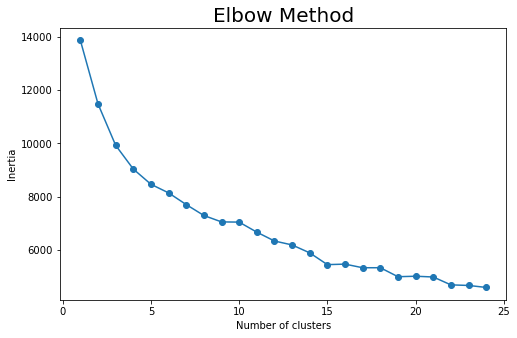

In [36]:
range_clusters = range(1, 25)
inertia_values = []

for i in range_clusters:
    km = KMeans(n_clusters=i, init='random')
    km.fit(X)
    inertia_values.append(km.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(range_clusters, inertia_values, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method', fontsize=20)

plt.show()

I'll use now the *kneed* library to find the knee of the curve automatically.

In [37]:
kl = KneeLocator(range_clusters, inertia_values, curve='convex', direction='decreasing')
n_clus = kl.elbow
print('Number of cluster to use:',n_clus)

Number of cluster to use: 8


### K-Means Clustering

In [38]:
km = KMeans(n_clusters=n_clus, init='random')

y_km = km.fit_predict(X)

In [39]:
# Add the cluster information to the DataFrame
df_rec_system['cluster'] = y_km

### Get a recomendation!

Finally, let's get a recomendation from this simple system! :D

In [40]:
# Choose a title you liked and how many recomendations you want
title_name = random.choice(df_rec_system['title'].to_numpy())
k = 3

In [41]:
# Get the title's cluster
cluster = df_rec_system.loc[df_rec_system['title'] == title_name, 'cluster'].values[0]

# Get all the titles from the selected cluster
# Assert: DO NOT show R rated content to non-adults!
if df_rec_system.loc[df_rec_system['title'] == title_name, 'R'].values[0] == 1:
    recomendations_pool = list(df_rec_system.loc[df_rec_system['cluster'] == cluster, 'title'])
else:
    recomendations_pool = list(df_rec_system.loc[(df_rec_system['cluster'] == cluster) & (df_rec_system['R'] == 0), 'title'])
    
# Remove the chosen title
recomendations_pool.remove(title_name)

# Now it would be nice to be able to order them by rating... /shrug

recomendations = random.choices(recomendations_pool, k=k)

In [42]:
print('If you liked \"', title_name,'\" then you should try these titles:' )

for i in recomendations:
    description = df_movies.loc[df_movies['title'] == i, 'description'].values[0]
    print('\n')
    print('-',i,'->',description)

If you liked " Chicken Kokkachi " then you should try these titles:


- Hadi İnşallah -> A young woman recovering poorly from a bad romance gets a new lease on life after encountering a handsome man during a job interview.


- Tremors: Shrieker Island -> When massive mutant creatures infiltrate an island nature preserve, scientists recruit a legendary monster hunter to battle the beasts.


- Jim Gaffigan: Cinco -> America's king of clean comedy delivers wickedly funny jokes in his fifth hour-long special.
